In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Question 1:

# part 2:

In [46]:
#define image1 here
image1 = [
  [141, 0 , 138, 143, 143, 143, 144],
  [141, 140, 140, 142, 142, 143, 143],
  [140, 145, 145, 144, 142, 142, 145],
  [141, 141, 141, 143, 142, 141, 143],
  [139, 140, 141, 141, 142, 143, 144]
]

In [3]:
#code here
#first define a function for calculating histogram
#you are free to use libraries
def calc_hist(image):
    '''
    you are free to use libraries
    calculate image histogram
    input(s):
      image (ndarray): input image
    output(s):
      hist (ndarray): computed input image histogram
    '''
    hist = np.zeros(256, dtype=int)
    for row in image:
        for pixel in row:
            hist[pixel] += 1
    return hist

Text(0.5, 1.0, 'histogram')

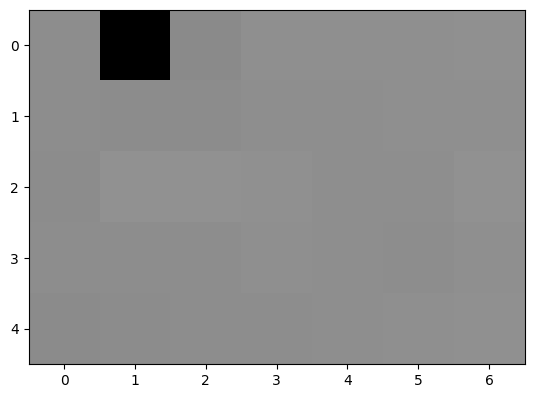

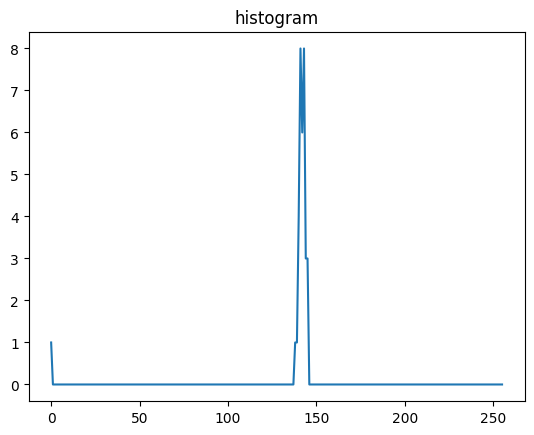

In [5]:
#dont change this cell
plt.imshow(image1,cmap='gray',vmin=0,vmax=255)
plt.figure()
plt.plot(calc_hist(image1))
plt.title('histogram')

In [22]:
#code here
#define a function (stretch) for stretching(input:image , output: stretched image)

def stretch_hist(image):
  '''
  don't use libraries
  input(s):
    image (ndarray): input image
  output(s):
    output_image (ndarray): enhanced image with histogram stretching
  '''
  output_image = image.copy()
  # Start
  minimum = min(map(min, output_image))
  maximum = max(map(max, output_image))

  output_image = [[(pixel - minimum) * 255 // (maximum - minimum) for pixel in row] for row in output_image]
  # End
  return output_image


Text(0.5, 1.0, 'stretched histogram')

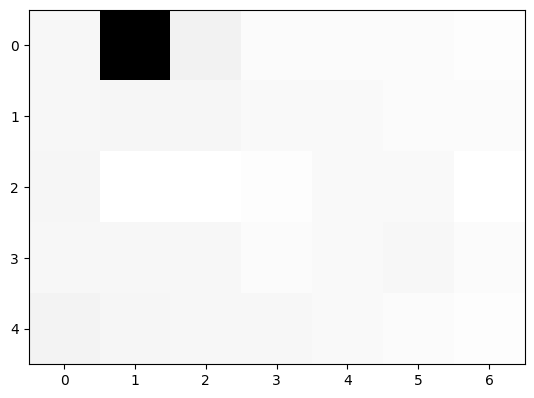

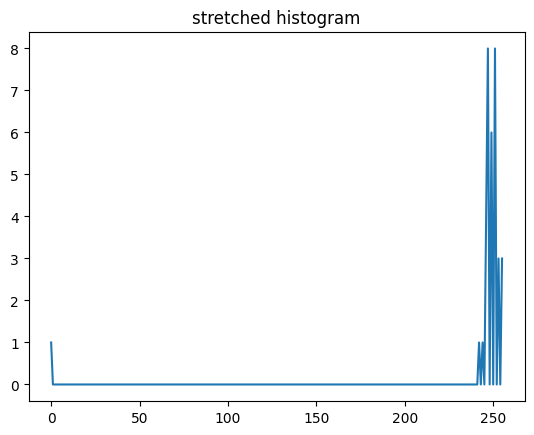

In [23]:
#dont change this cell
plt.imshow(stretch_hist(image1),cmap='gray',vmin=0,vmax=255)
plt.figure()
plt.plot(calc_hist(stretch_hist(image1)))
plt.title('stretched histogram')

In [47]:
#code here
#define a function (Clip) for Clipping(input:image , output: Clipped image)

def clip_hist(image, min_value, max_value):
  '''
  don't use libraries
  input(s):
    image (ndarray): input image
    min_value : min value of the histogram which you wanna clip.
    max_value : max value of the histogram which you wanna clip.
  output(s):
    output_image (ndarray): enhanced image with histogram clipping
  '''
  output_image = image.copy()
  # Start
  for i in range(len(image)):
    for j in range(len(image[i])):
      if image[i][j] < min_value:
        output_image[i][j] = 0
      elif image[i][j] > max_value:
        output_image[i][j] = 255
      else:
        output_image[i][j] = (image[i][j] - min_value) * 255 // (max_value - min_value)
  # End
  return output_image


Text(0.5, 1.0, 'clipped histogram')

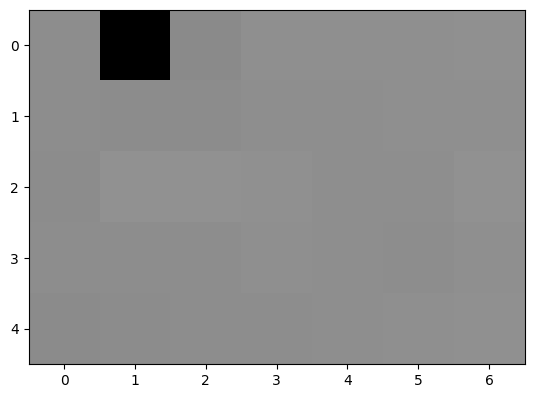

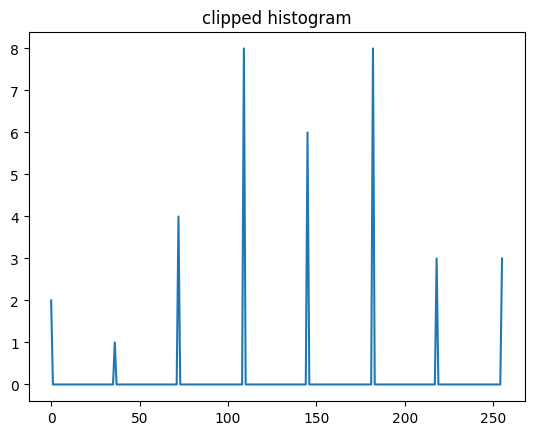

In [48]:
#dont change this cell
min_value = 138# your min value here
max_value = 145# your max value here
plt.imshow(image1,cmap='gray',vmin=0,vmax=255)
plt.figure()
plt.plot(calc_hist(clip_hist(image1,min_value, max_value)))
plt.title('clipped histogram')

# part3


In [27]:
# first read the image and show it.(image2)
image2 = cv2.imread('image2.png', cv2.IMREAD_GRAYSCALE)

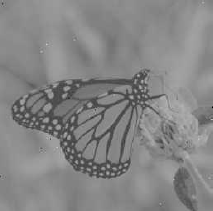

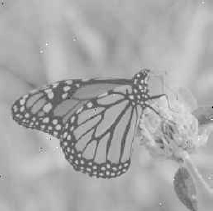

Text(0.5, 1.0, 'stretched histogram')

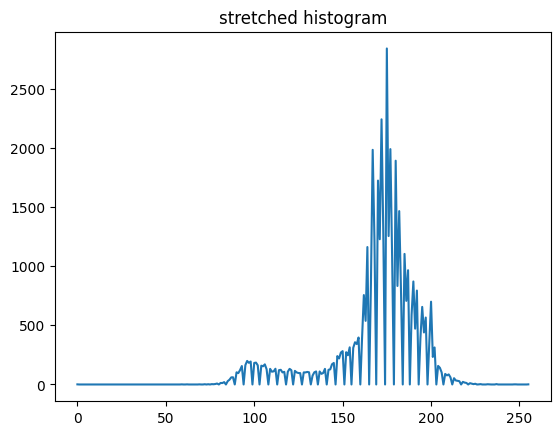

In [33]:
#use stretch_hist function to improve quality of the image and show it
from google.colab.patches import cv2_imshow
cv2_imshow(image2)

stretched_image2 = np.array(stretch_hist(image2))
cv2_imshow(stretched_image2)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.figure()
plt.plot(calc_hist(stretch_hist(image2)))
plt.title('stretched histogram')

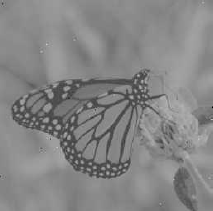

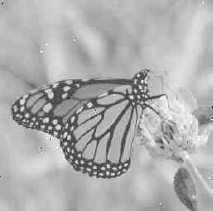

Text(0.5, 1.0, 'clipped histogram')

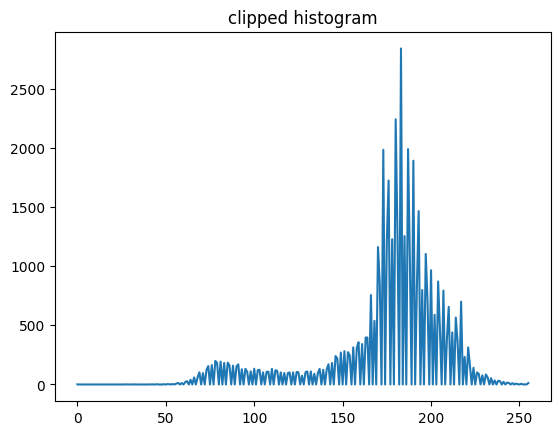

In [49]:
#use clip_hist function to improve quality of the image and show it
min_value = 30# your min value here
max_value = 180# your max value here

cv2_imshow(image2)

clipped_image2 = clip_hist(image2, min_value, max_value)
cv2_imshow(clipped_image2)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.figure()
plt.plot(calc_hist(clip_hist(image2,min_value, max_value)))
plt.title('clipped histogram')